I will start this task of Super Market analysis by importing the necessary Python libraries and loading 
the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**Data Processing**

In [4]:
missing_values = df.isna().values.sum()
print("# of missing values:", missing_values)

og_num_rows = df.shape[0]
df_no_na = df.dropna()
altered_num_rows = df_no_na.shape[0]
print("# of rows in original df:", og_num_rows)
print("# of rows after dropping missing values:", altered_num_rows)



# of missing values: 0
# of rows in original df: 1000
# of rows after dropping missing values: 1000


In [28]:
df.dtypes


Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
gross_margin               float64
dtype: object

In [8]:
df.columns


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [10]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


**1. What is the average total amount spent by each customer type and gender**

Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64


<Axes: title={'center': 'Average Total Amount Spent By Customer type '}, xlabel='Customer type'>

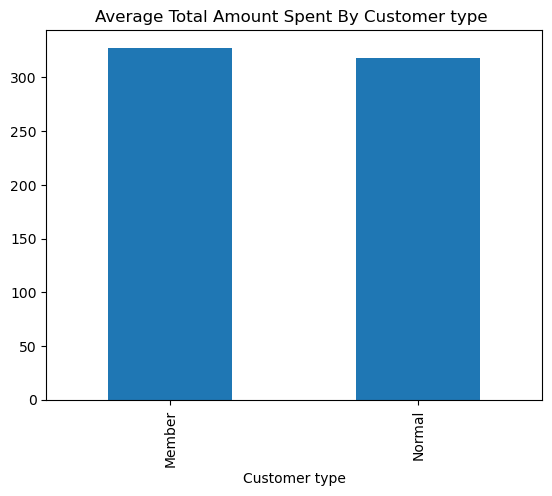

In [11]:
df_customer_type = df.groupby('Customer type')['Total'].mean()
print(df_customer_type)

# visualize the df_customer_type
df_customer_type.plot(kind='bar', title = 'Average Total Amount Spent By Customer type ')

Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64


<Axes: title={'center': 'Average Total Amount Spent By Gender'}, xlabel='Gender'>

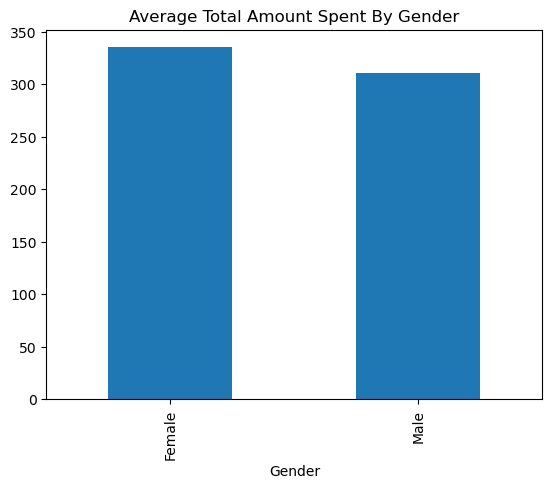

In [26]:
df_genderr = df.groupby('Gender')['Total'].mean()
print(df_genderr)

df_genderr.plot(kind='bar', title = 'Average Total Amount Spent By Gender')

**2. What is the total sales for each gender and product line combination?**

<Axes: xlabel='Product line', ylabel='Total'>

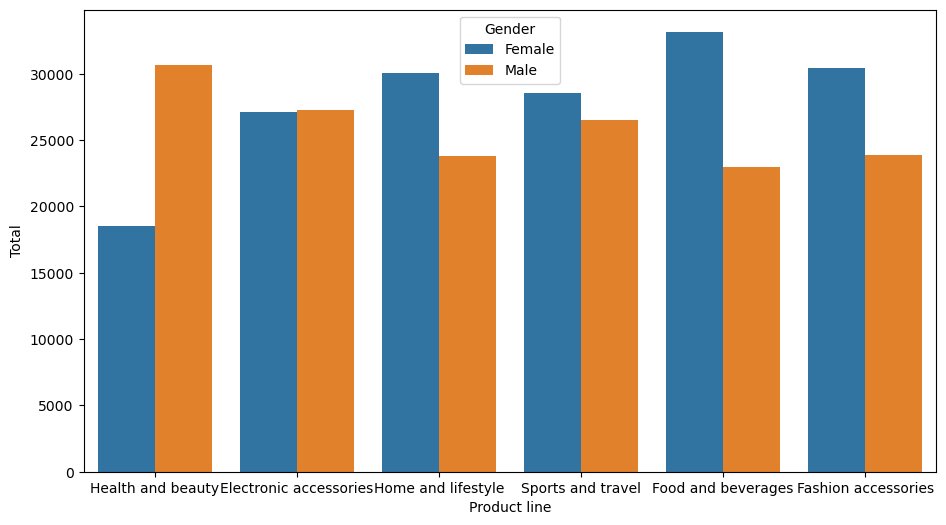

In [15]:
plt.figure(figsize=(11,6))
sns.barplot(x='Product line', y = 'Total', hue = 'Gender', data = df, estimator = sum, errorbar=None)

Gender  Product line          
Female  Electronic accessories    27102.0225
        Fashion accessories       30437.4000
        Food and beverages        33170.9175
        Health and beauty         18560.9865
        Home and lifestyle        30036.8775
        Sports and travel         28574.7210
Male    Electronic accessories    27235.5090
        Fashion accessories       23868.4950
        Food and beverages        22973.9265
        Health and beauty         30632.7525
        Home and lifestyle        23825.0355
        Sports and travel         26548.1055
Name: Total, dtype: float64


<Axes: title={'center': 'Total Sales for each Group of Gender and Product Line'}, xlabel='Gender,Product line'>

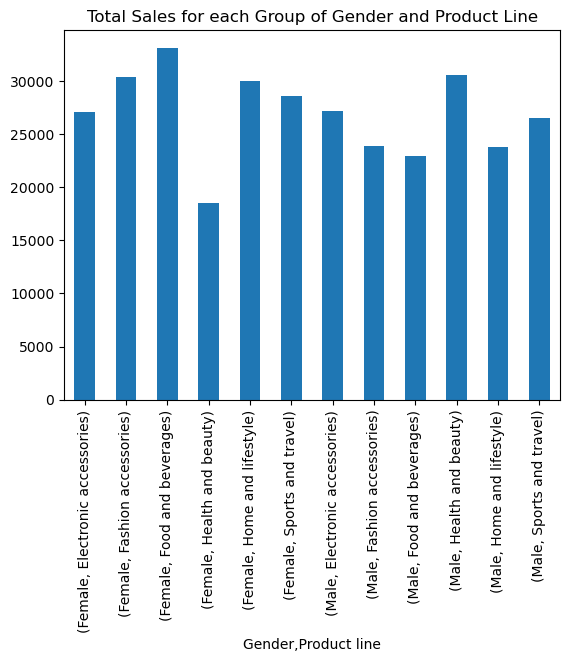

In [27]:
df_gender_product_line = df.groupby(['Gender', 'Product line'])['Total'].sum()
print(df_gender_product_line)

df_gender_product_line.plot(kind='bar', title = 'Total Sales for each Group of Gender and Product Line')

**3. What is the average unit price for each product line?**

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64


<Axes: title={'center': 'Average Unit Price For Each Product Line'}, xlabel='Product line'>

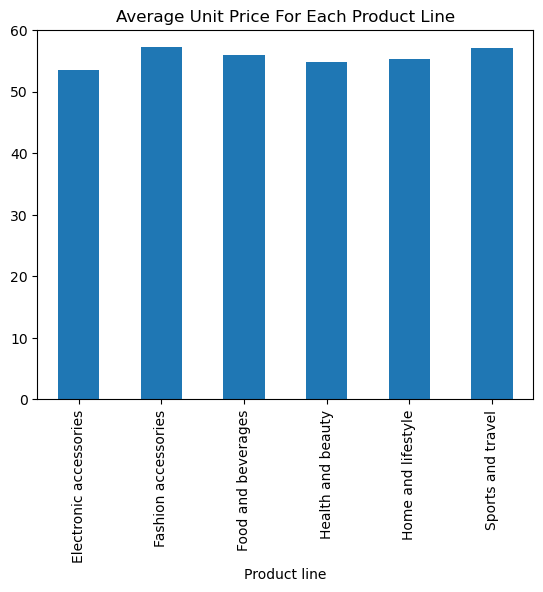

In [24]:

df_product_line_price = df.groupby('Product line')['Unit price'].mean()
print(df_product_line_price)

df_product_line_price.plot(kind='bar', title = 'Average Unit Price For Each Product Line')

**4. What is the overall gross margin percentage?**

In [18]:
# calculate the overall gross margin percentage

df['gross_margin'] = (df['Total'] - df['cogs']) / df['Total']
overall_gross_margin = df['gross_margin'].mean()

print(overall_gross_margin)

0.04761904761904762


With a gross margin of **0.047**, this means that out of the total revenue, only **4.76%** is left after accounting for the COGS. This shows a low profit level for the Supermarket. To improve the profitability, the business can try to reduce the COGS or increase the revenue.

**5. Which cities are the biggest contributors to the overall sales?**

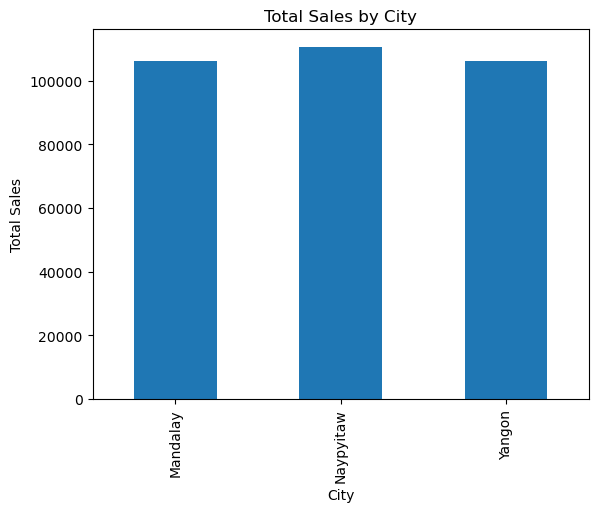

In [19]:
import matplotlib.pyplot as plt

df_city_sales = df.groupby('City')['Total'].sum()

df_city_sales.plot(kind='bar')

plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

**6. Which product lines are the most popular among customers?**

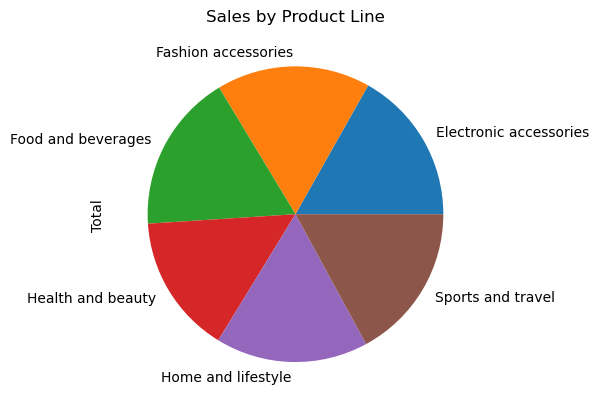

In [20]:

df.groupby('Product line')['Total'].sum().plot(kind='pie')

plt.title('Sales by Product Line')
plt.show()

**7. What is the relationship between the unit price and the quantity of each product?**
